In [3]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) # 重さにランダムな値を与えておく
        self.params['b1'] = np.zeros(hidden_size) # バイアスは0でよい
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    
    def predict(self, x):
        #layer1
        W1 = self.params['W1']
        b1 = self.params['b1']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        
        # layer2
        W2 = self.params['W2']
        b2 = self.params['b2']
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2) # 正解でないラベルは無視
        
        return y
    
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t) # 交差エントロピーで損失関数を計算
    
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 最大値の入っている配列のインデックスを返す
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {} # 損失関数からそれぞれの勾配を求める
        for key in ('W1', "b1", "W2", "b2"):
            grads[key] = numerical_gradient(loss_W, self.params[key])
        return grads
    
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads={}
        
        batch_num = x.shape[0]

        #forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2) # 正解でないラベルは無視
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)
        
        return grads

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
train_acc, test_acc | 0.09736666666666667, 0.0982
train_acc, test_acc | 0.92585, 0.9253
train_acc, test_acc | 0.9484333333333334, 0.948
train_acc, test_acc | 0.9599333333333333, 0.9573
train_acc, test_acc | 0.9659166666666666, 0.9614
train_acc, test_acc | 0.9692666666666667, 0.9636
train_acc, test_acc | 0.9731333333333333, 0.9669
train_acc, test_acc | 0.9773166666666666, 0.9687
train_acc, test_acc | 0.9782666666666666, 0.971
train_acc, test_acc | 0.981, 0.969
train_acc, test_acc | 0.9823666666666667, 0.971
train_acc, test_acc | 0.9820333333333333, 0.9726
train_acc, test_acc | 0.9842333333333333, 0.9726
train_acc, test_acc | 0.9841333333333333, 0.9711
train_acc, test_acc | 0.9865, 0.9725
train_a

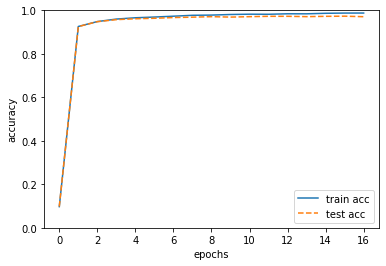

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

# 学習データとテストデータの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10) # input_size=28*28px

items_num = 10000 #繰り返しの回数
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 1

#グラフ描画用の配列の作成
train_loss_list = []
train_acc_list = []
test_acc_list = []

item_per_epoch = max(train_size / batch_size, 1) #エポック: 訓練データを使い切る回数

for i in range(items_num):
    batch_mask = np.random.choice(train_size, batch_size) # batch_size分訓練データを取ってくる
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #勾配の計算
    grad = network.gradient(x_batch, t_batch)
    
    #パラメータの更新
    for key in ('W1', "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key] # 勾配方向にパラメータを進めて減少関数の値を減らすようにする
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % item_per_epoch == 0: #訓練データを使い切った時，テストデータで評価する
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test_acc | " + str(train_acc) + ", " + str(test_acc))
    
#グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 感想
　numerical_gradientで勾配を計算した結果，1エポックが終了するまでに時間がかかり最後まで終えることができなかったが，非常に時間がかかりそうだと感じた。全ての数値を微分して計算するのは実用的でないと感じた。過学習を再現しようとして，hidden_sizeの値を小さくし，items_numの値を大きくすることを試してみたが，過学習の状態にはならなかった。訓練データとテストデータが似ているためだと考えられる。今回のデータの場合，learning_rateが1から2のときに正確度が一番高くなることが分かった。

# 参考文献
- [【ゼロから作るDeep Learning】4章 ニューラルネットワークの学習](http://yusuke-ujitoko.hatenablog.com/entry/2016/12/27/195809)
- [numpy.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)